# 1. Install and Import Dependencies

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126


Looking in indexes: https://download.pytorch.org/whl/cu126


In [3]:
!git clone https://github.com/ultralytics/yolov5

'git' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [20]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-2-23 Python-3.12.3 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

100%|██████████| 14.1M/14.1M [00:03<00:00, 4.04MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [8]:
img = "images.jpeg"

In [9]:
results = model(img)
results.print()

C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 183x275 15 cars, 1 motorcycle, 7 trucks
Speed: 45.2ms pre-process, 108.2ms inference, 124.3ms NMS per image at shape (1, 3, 448, 640)


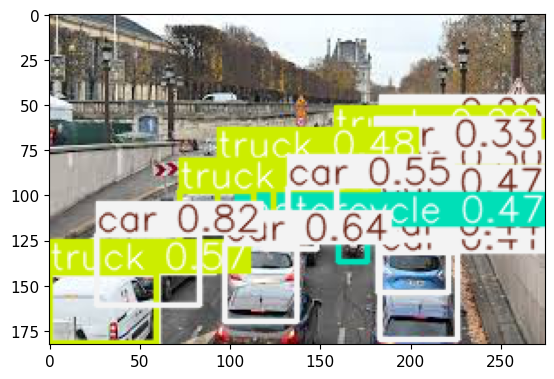

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

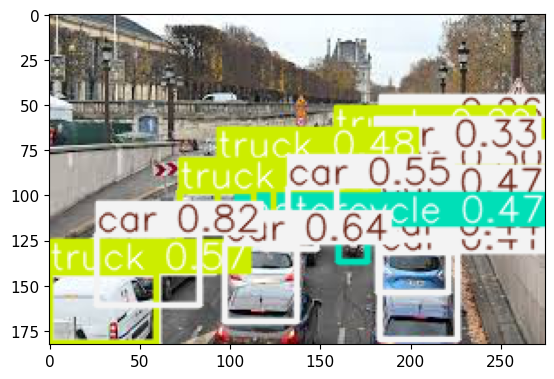

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[181, 167, 156],
         [185, 171, 162],
         [141, 128, 120],
         ...,
         [144, 131, 122],
         [147, 134, 125],
         [142, 129, 120]],
 
        [[102,  89,  73],
         [101,  87,  74],
         [151, 139, 127],
         ...,
         [131, 121, 112],
         [136, 126, 117],
         [133, 123, 114]],
 
        [[131, 116,  95],
         [114, 101,  82],
         [130, 117, 100],
         ...,
         [113, 104,  97],
         [119, 110, 103],
         [118, 109, 102]],
 
        ...,
 
        [[204, 237,   0],
         [204, 237,   0],
         [217, 237,  98],
         ...,
         [142, 128, 119],
         [148, 134, 125],
         [155, 141, 132]],
 
        [[204, 237,   0],
         [204, 237,   0],
         [204, 237,   0],
         ...,
         [140, 126, 117],
         [146, 132, 123],
         [153, 139, 130]],
 
        [[204, 237,   0],
         [204, 237,   0],
         [204, 237,   0],
         ...,
         [138, 124, 115],
  

# 4. Real Time Detections

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\sanath/.cache\torch\hub\ultralytics_yolov5_master\m

# 5. Train from scratch

In [1]:
import uuid   # Unique identifier
import os
import time

In [2]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [8]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [9]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.d45ce422-f208-11ef-9a0b-d8c54253d118.jpg


In [10]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.d78037e3-f208-11ef-959d-d8c54253d118.jpg
data\images\awake.d78037e4-f208-11ef-800d-d8c54253d118.jpg
data\images\awake.d78037e5-f208-11ef-b4cb-d8c54253d118.jpg
data\images\awake.d78037e6-f208-11ef-94f2-d8c54253d118.jpg
data\images\awake.d78037e7-f208-11ef-a20f-d8c54253d118.jpg
data\images\awake.d78037e8-f208-11ef-ad1b-d8c54253d118.jpg
data\images\awake.d78037e9-f208-11ef-874c-d8c54253d118.jpg
data\images\awake.d78037ea-f208-11ef-9eef-d8c54253d118.jpg
data\images\awake.d7804b91-f208-11ef-991c-d8c54253d118.jpg
data\images\awake.d7804b92-f208-11ef-8228-d8c54253d118.jpg
data\images\awake.d7804b93-f208-11ef-acaf-d8c54253d118.jpg
data\images\awake.d7804b94-f208-11ef-beae-d8c54253d118.jpg
data\images\awake.d7804b95-f208-11ef-8900-d8c54253d118.jpg
data\images\awake.d7804b96-f208-11ef-9a67-d8c54253d118.jpg
data\images\awake.d7804b97-f208-11ef-b8c0-d8c54253d118.jpg
data\images\awake.d7804b98-f208-11ef-b98a-d8c54253d118.jpg
data\images\awake.d7804b99-f208-11ef-b13e-d8c54253d118.j

In [7]:
!git clone https://github.com/tzutalin/labelImg

'git' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
cd yolov5

[WinError 2] The system cannot find the file specified: 'yolov5'
c:\drowsiness_detection\yolov5


In [25]:
!python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

Traceback (most recent call last):
  File "c:\Users\sanath\anaconda3\Lib\site-packages\git\__init__.py", line 296, in <module>
    refresh()
  File "c:\Users\sanath\anaconda3\Lib\site-packages\git\__init__.py", line 287, in refresh
    if not Git.refresh(path=path):
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sanath\anaconda3\Lib\site-packages\git\cmd.py", line 631, in refresh
    raise ImportError(err)
ImportError: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging le

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


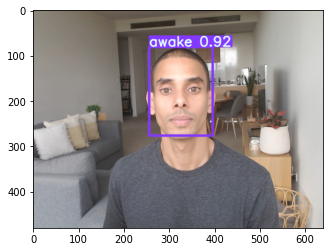

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()